In [1]:
%load_ext rpy2.ipython
%R X=c(1,4,5,7); sd(X); mean(X)

array([ 4.25])

In [2]:
import pandas as pd

In [3]:
temp_data = [1,2,3,4,5,6,7,8]
print(temp_data[2:4])

[3, 4]


In [8]:
%R library(car)

array(['car', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], 
      dtype='<U9')

In [9]:
%R car <- library(car)

array(['car', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], 
      dtype='<U9')

In [10]:
%R car

array(['car', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], 
      dtype='<U9')

In [12]:
%R class(car)

array(['character'], 
      dtype='<U9')

# Regression Test

## Outliers

In [12]:
library(car)
fit <- lm(mpg~disp+hp+wt+drat, data=mtcars)

In [13]:
head(mtcars,3)
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4



No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
               rstudent unadjusted p-value Bonferonni p
Toyota Corolla  2.51597            0.01838      0.58816

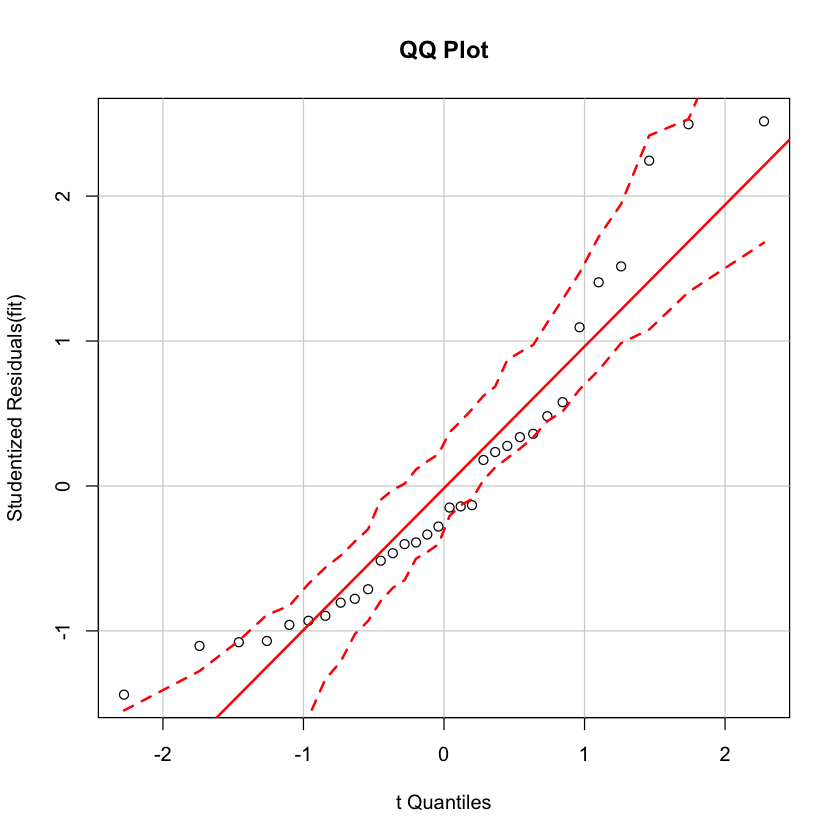

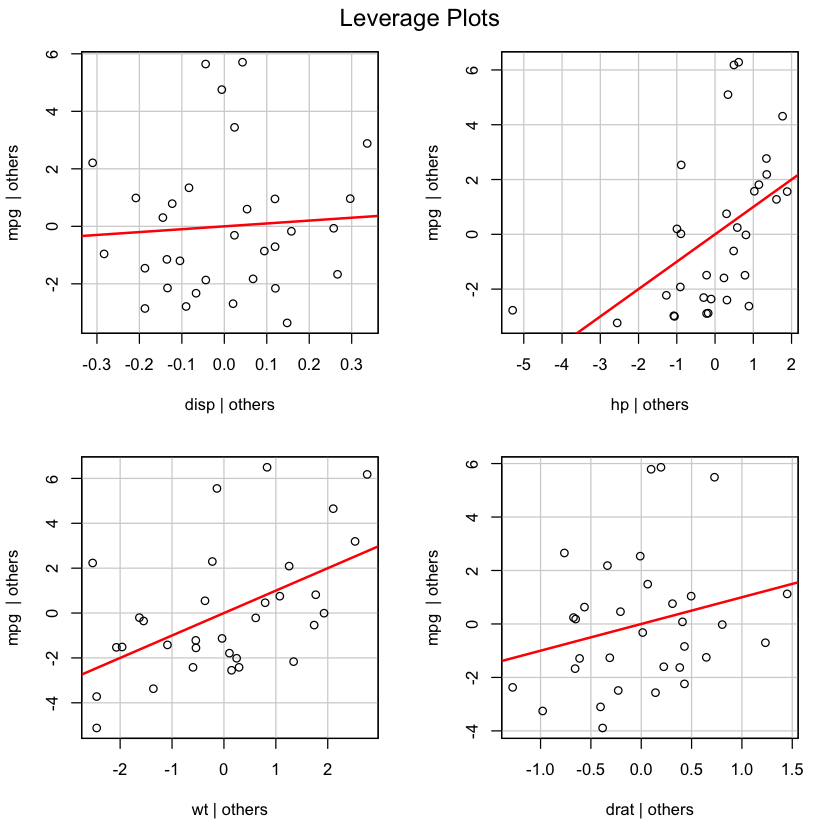

In [14]:
outlierTest(fit)
qqPlot(fit, main="QQ Plot")
leveragePlots(fit)

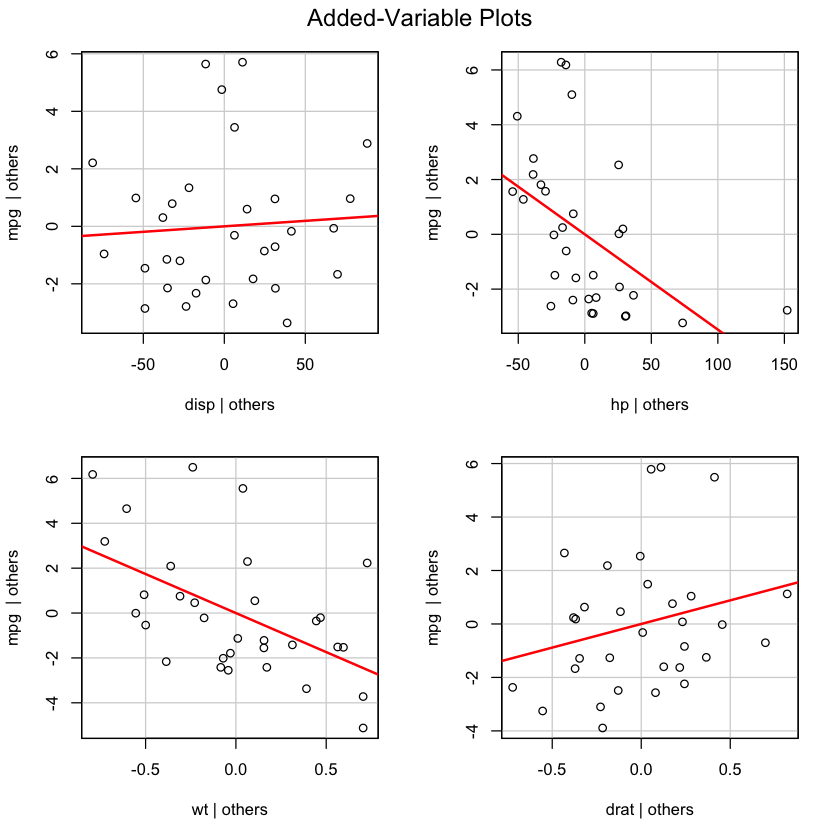

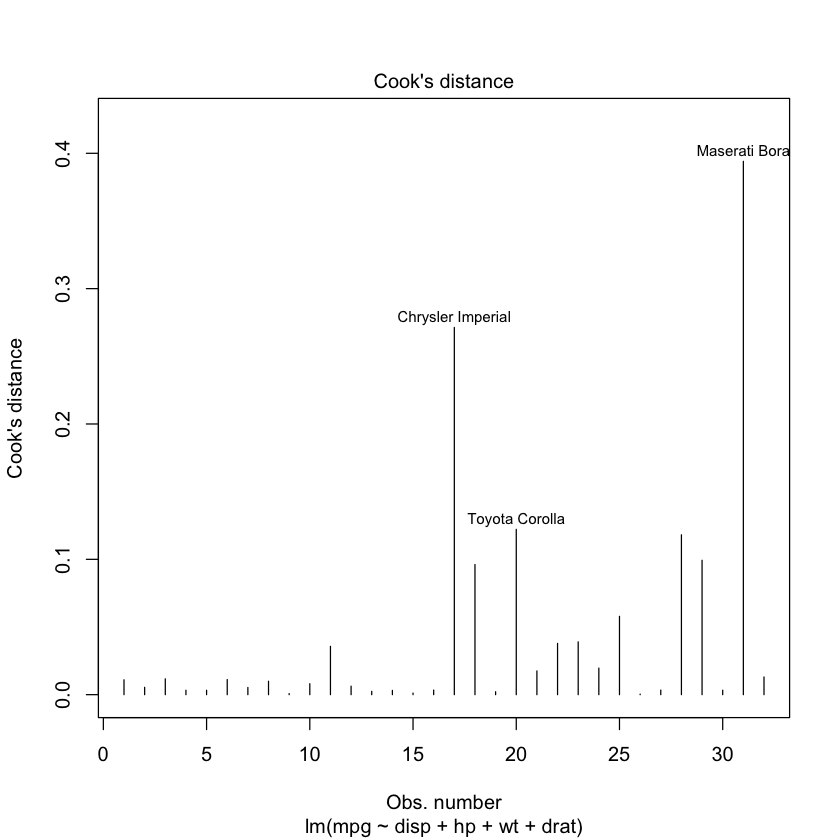

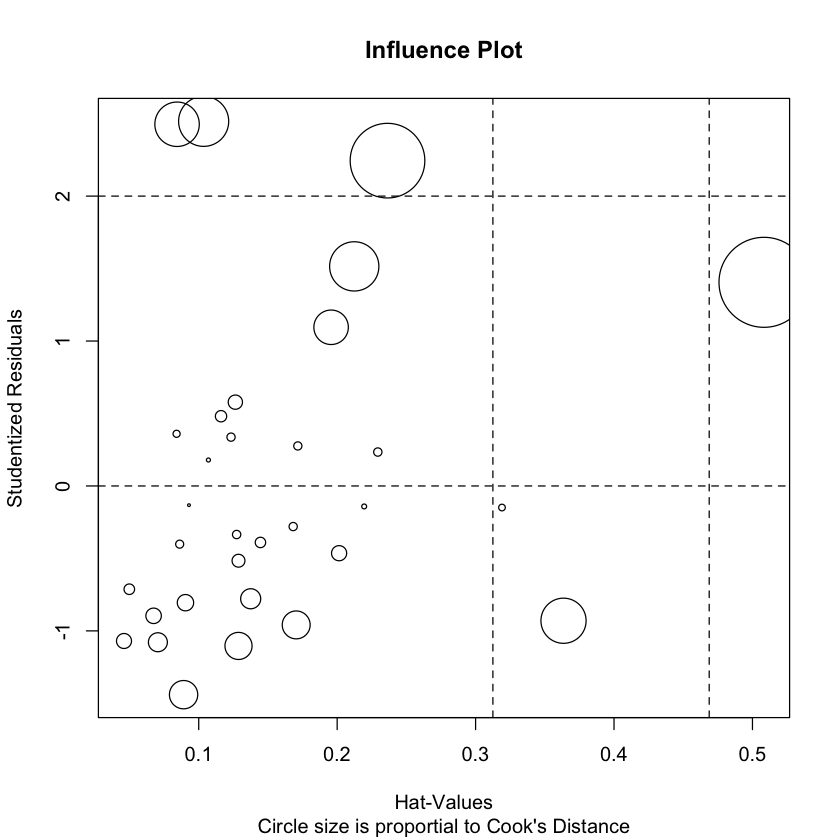

In [15]:
# Influential Observations
# added variable plots 
avPlots(fit)
# Cook's D plot
# identify D values > 4/(n-k-1) 
cutoff <- 4/((nrow(mtcars)-length(fit$coefficients)-2)) 
plot(fit, which=4, cook.levels=cutoff)
# Influence Plot 
influencePlot(fit,	id.method="identify", main="Influence Plot", sub="Circle size is proportial to Cook's Distance" )

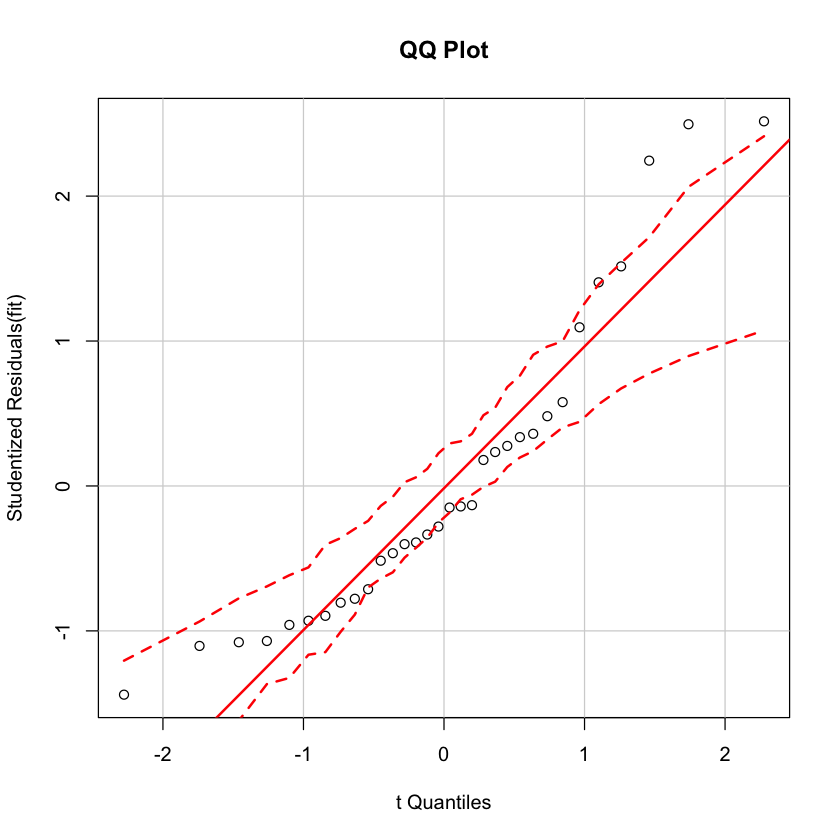

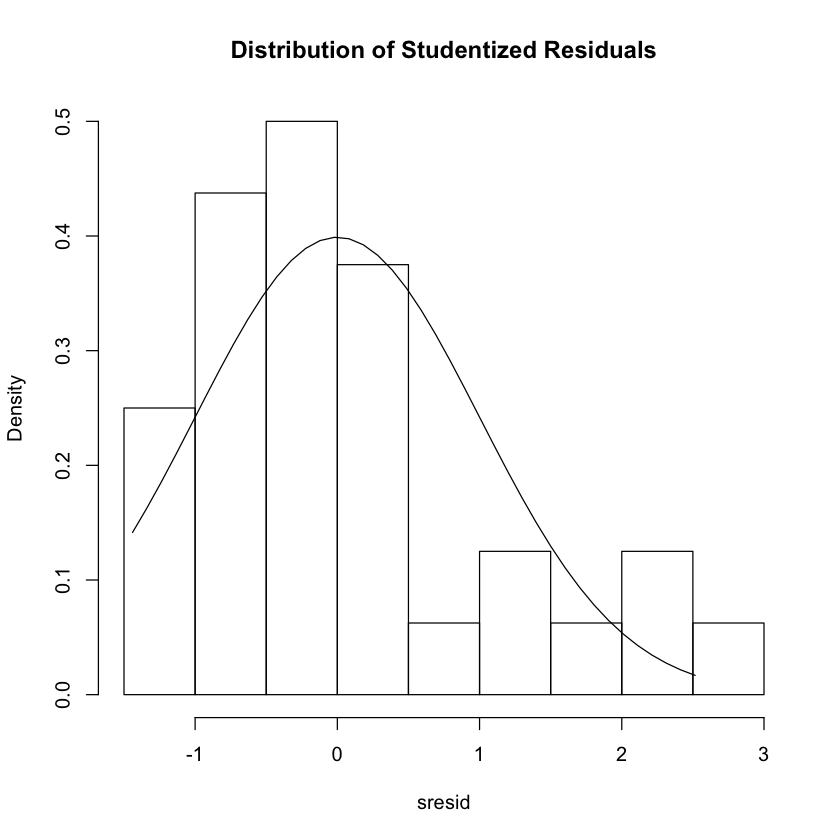

In [16]:
# Normality of Residuals
# qq plot for studentized resid
qqPlot(fit, main="QQ Plot")
# distribution of studentized residuals
library(MASS)
sresid <- studres(fit) 
hist(sresid, freq=FALSE, 
   main="Distribution of Studentized Residuals")
xfit<-seq(min(sresid),max(sresid),length=40) 
yfit<-dnorm(xfit) 
lines(xfit, yfit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.429672    Df = 1     p = 0.231818 


Suggested power transformation:  0.6616338 

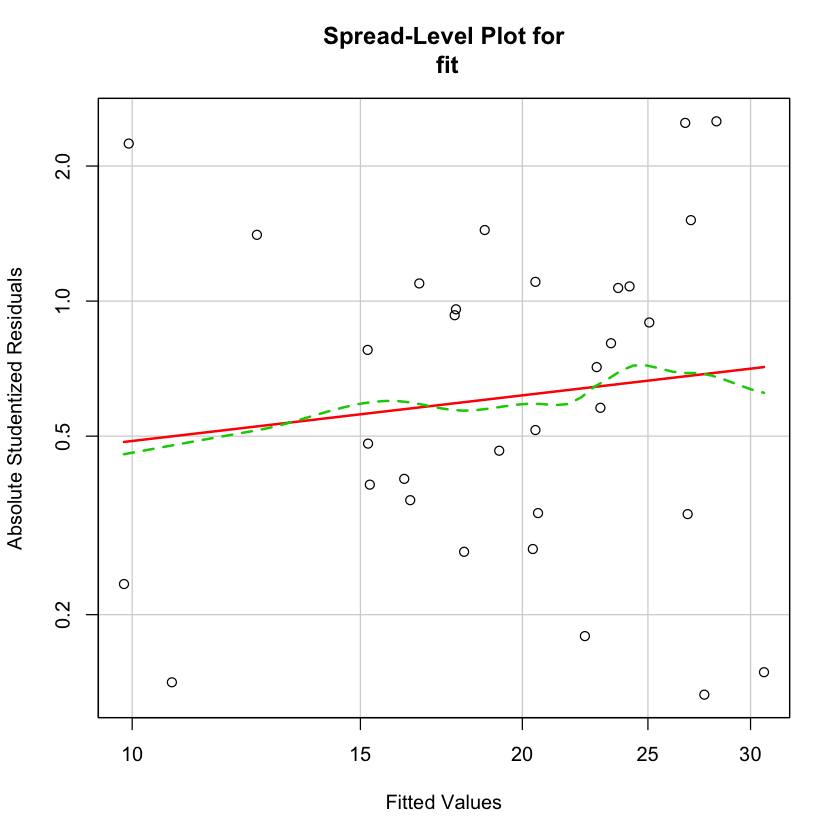

In [17]:
# Evaluate homoscedasticity
# non-constant error variance test
ncvTest(fit)
# plot studentized residuals vs. fitted values 
spreadLevelPlot(fit)

In [18]:
# Evaluate Collinearity
vif(fit) # variance inflation factors 
sqrt(vif(fit)) > 2 # problem?

disp       hp       wt     drat 
8.209402 2.894373 5.096601 2.279547

disp    hp    wt  drat 
 TRUE FALSE  TRUE FALSE

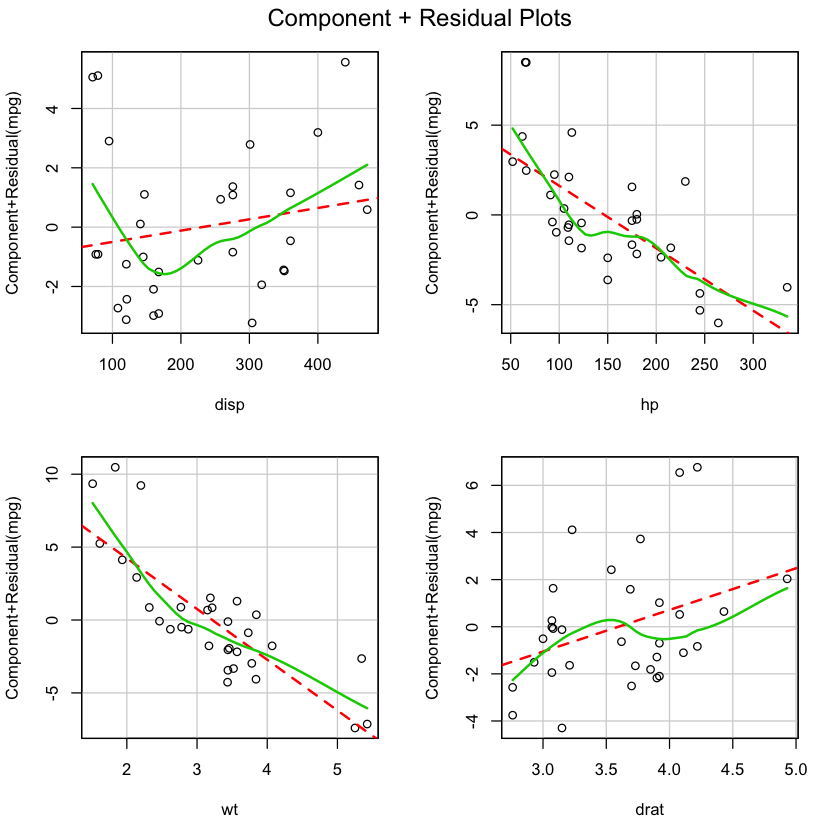

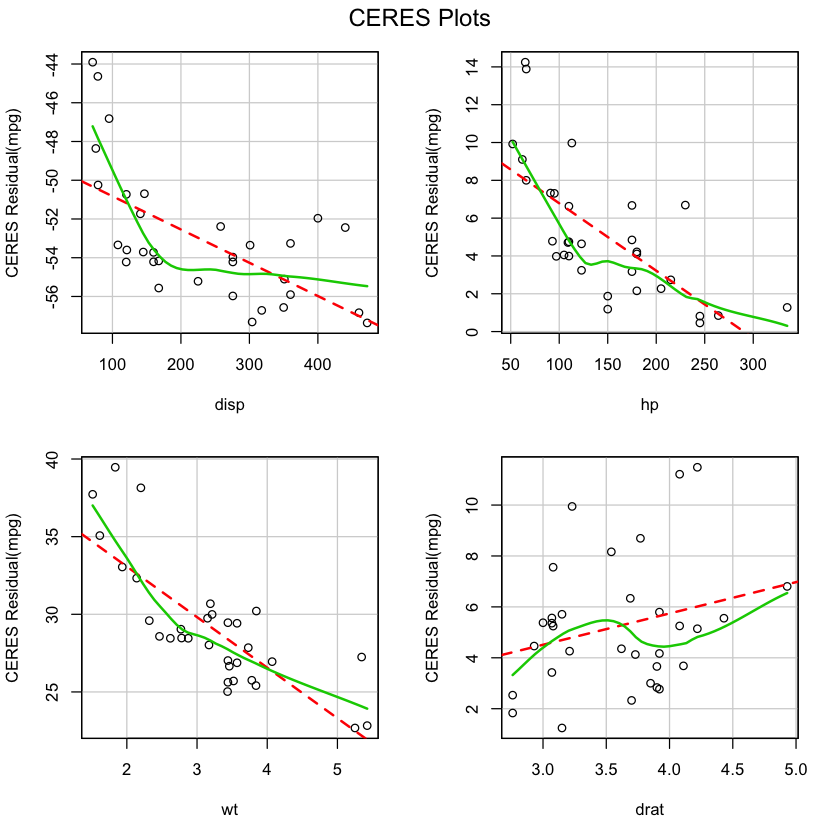

In [19]:
# Evaluate Nonlinearity
# component + residual plot 
crPlots(fit)
# Ceres plots 
ceresPlots(fit)

In [20]:
# Test for Autocorrelated Errors
durbinWatsonTest(fit)

 lag Autocorrelation D-W Statistic p-value
   1        0.100862      1.735915   0.292
 Alternative hypothesis: rho != 0

In [21]:
# Global test of model assumptions
#library(gvlma)
#gvmodel <- gvlma(fit) 
#summary(gvmodel)

## R Regression Example with Harvard

In [24]:
getwd()

[1] "/Users/Lydia/GraphLab/Tutorial"

In [29]:
install.packages("foreign")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [32]:
library(foreign)

In [33]:
states.data <- read.dta("/Users/Lydia/GraphLab/0534396542_3989/states.dta", convert.dates = TRUE, convert.factors = TRUE,
         missing.type = FALSE,
         convert.underscore = FALSE, warn.missing.labels = TRUE)

In [73]:
class(states.data)

[1] "data.frame"

In [38]:
states.info <- data.frame(attributes(states.data)[c("names", "var.labels")])

In [43]:
tail(states.info, 8)

,names,var.labels
14,csat,Mean composite SAT score
15,vsat,Mean verbal SAT score
16,msat,Mean math SAT score
17,percent,% HS graduates taking SAT
18,expense,Per pupil expenditures prim&sec
19,income,Median household income
20,high,% over 25 w/HS diploma
21,college,% over 25 w/bachelor's degree +


In [53]:
sts.ex.sat <- subset(states.data,select=c("expense","csat"))
#sts.ex.sat <- subset(states.data,select=c("expense","csat","vsat","msat"))

In [54]:
summary(sts.ex.sat)

    expense          csat       
 Min.   :2960   Min.   : 832.0  
 1st Qu.:4352   1st Qu.: 888.0  
 Median :5000   Median : 926.0  
 Mean   :5236   Mean   : 944.1  
 3rd Qu.:5794   3rd Qu.: 997.0  
 Max.   :9259   Max.   :1093.0  

In [55]:
cor(sts.ex.sat)

,expense,csat
expense,1.0000000,-0.4662978
csat,-0.4662978,1.0000000


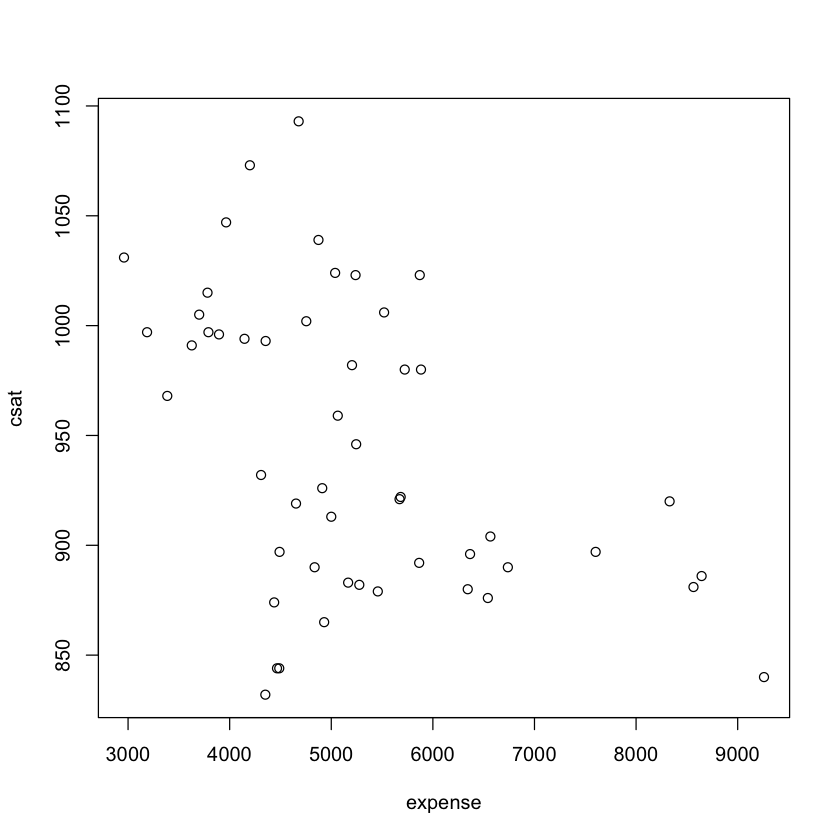

In [56]:
plot(sts.ex.sat)

In [57]:
sat.mod <- lm(csat ~ expense, # regression formula
              data=states.data) # data set

In [58]:
summary(sat.mod)


Call:
lm(formula = csat ~ expense, data = states.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-131.811  -38.085    5.607   37.852  136.495 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.061e+03  3.270e+01   32.44  < 2e-16 ***
expense     -2.228e-02  6.037e-03   -3.69 0.000563 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 59.81 on 49 degrees of freedom
Multiple R-squared:  0.2174,	Adjusted R-squared:  0.2015 
F-statistic: 13.61 on 1 and 49 DF,  p-value: 0.0005631


In [59]:
summary(lm(csat ~ expense + percent, data = states.data))


Call:
lm(formula = csat ~ expense + percent, data = states.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.921 -24.318   1.741  15.502  75.623 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 989.807403  18.395770  53.806  < 2e-16 ***
expense       0.008604   0.004204   2.046   0.0462 *  
percent      -2.537700   0.224912 -11.283 4.21e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.62 on 48 degrees of freedom
Multiple R-squared:  0.7857,	Adjusted R-squared:  0.7768 
F-statistic: 88.01 on 2 and 48 DF,  p-value: < 2.2e-16


In [76]:
names(sat.mod)
coefficients(sat.mod)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

(Intercept)       expense 
1060.73244395   -0.02227565

In [77]:
class(sat.mod)

[1] "lm"

In [78]:
methods(class = class(sat.mod))[1:9]

[1] "add1.lm"     "addterm.lm"  "alias.lm"    "anova.lm"    "Anova.lm"   
[6] "avPlot.lm"   "Boot.lm"     "bootCase.lm" "boxcox.lm"

In [79]:
confint(sat.mod)

,2.5 %,97.5 %
(Intercept),995.01753164,1126.44735626
expense,-0.03440768,-0.01014361


## Normality & Homoscedasticity Test


No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferonni p
16 2.420147           0.019349       0.9868

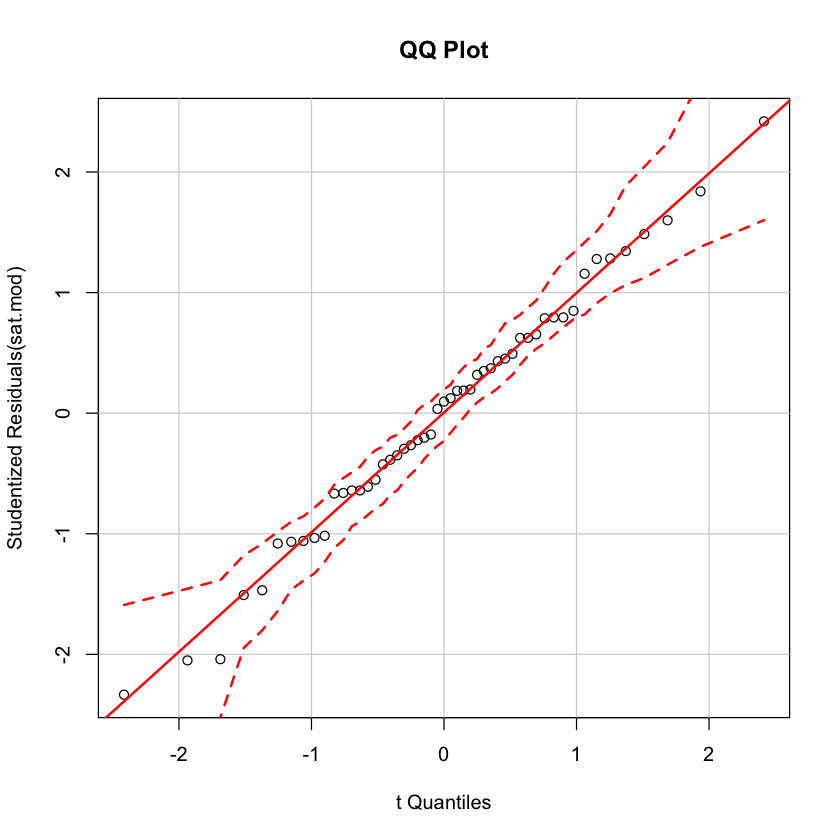

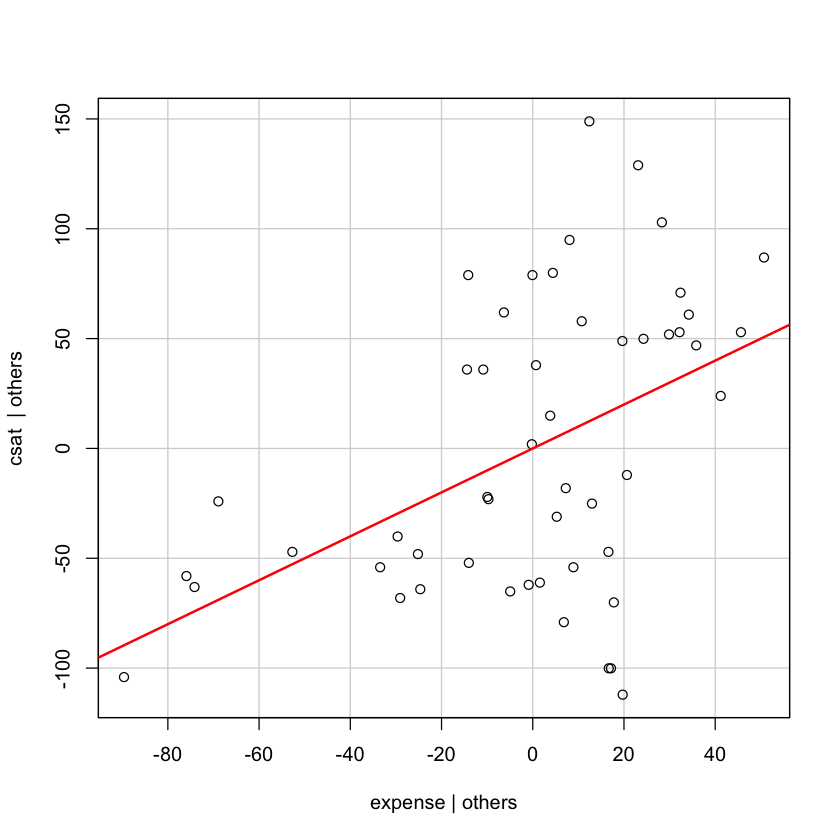

In [135]:
outlierTest(sat.mod )
qqPlot(sat.mod , main="QQ Plot")
leveragePlots(sat.mod)

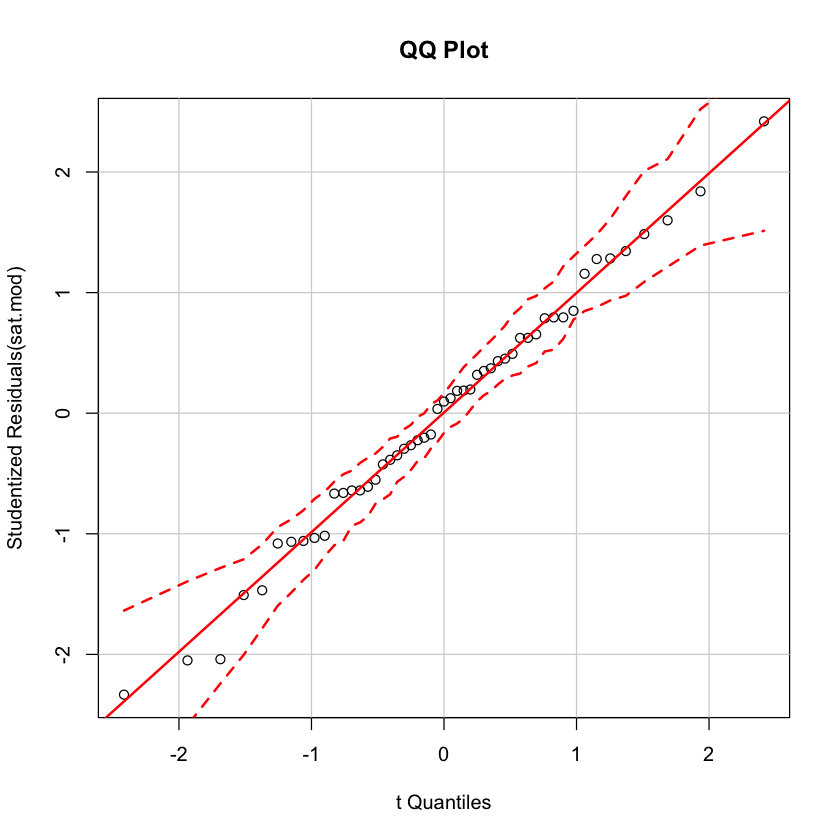

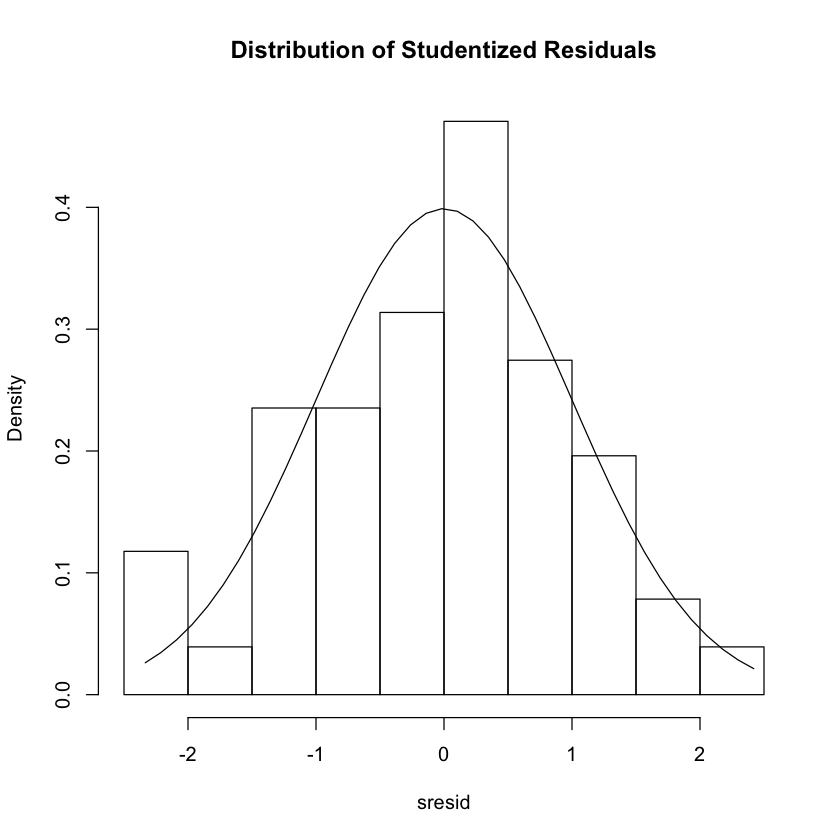

In [136]:
# Normality of Residuals
# qq plot for studentized resid
qqPlot(sat.mod , main="QQ Plot")
# distribution of studentized residuals
library(MASS)
sresid <- studres(sat.mod ) 
hist(sresid, freq=FALSE, 
   main="Distribution of Studentized Residuals")
xfit<-seq(min(sresid),max(sresid),length=40) 
yfit<-dnorm(xfit) 
lines(xfit, yfit)

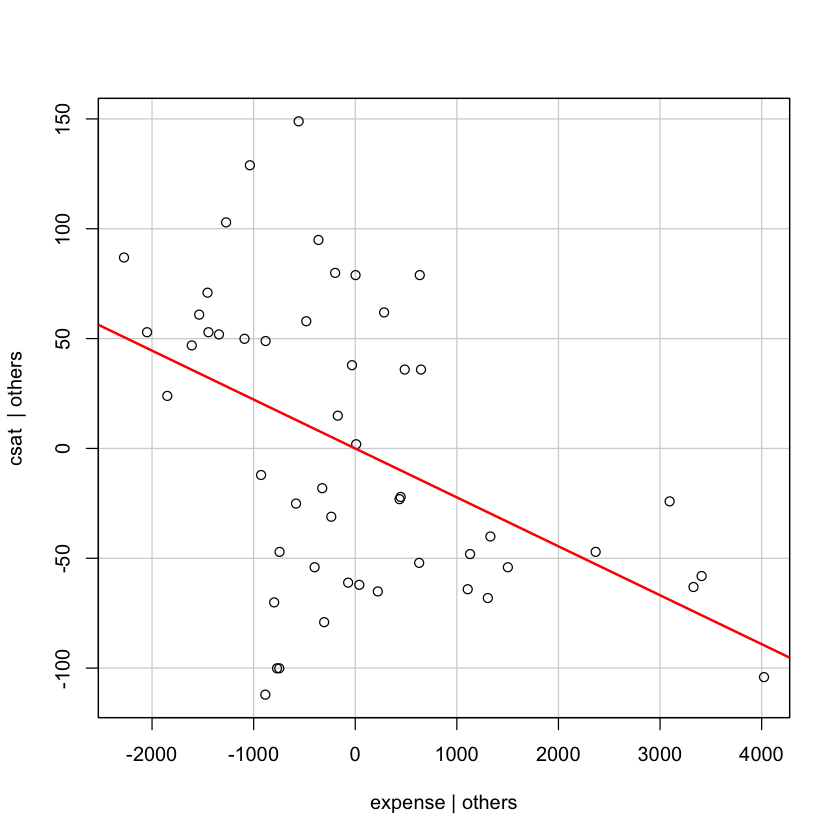

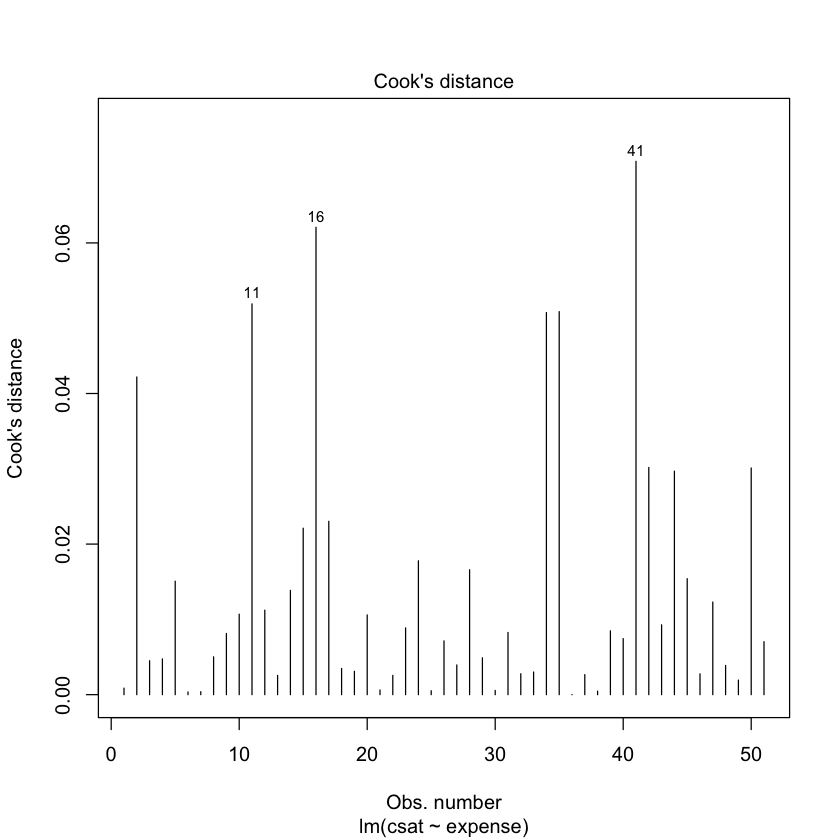

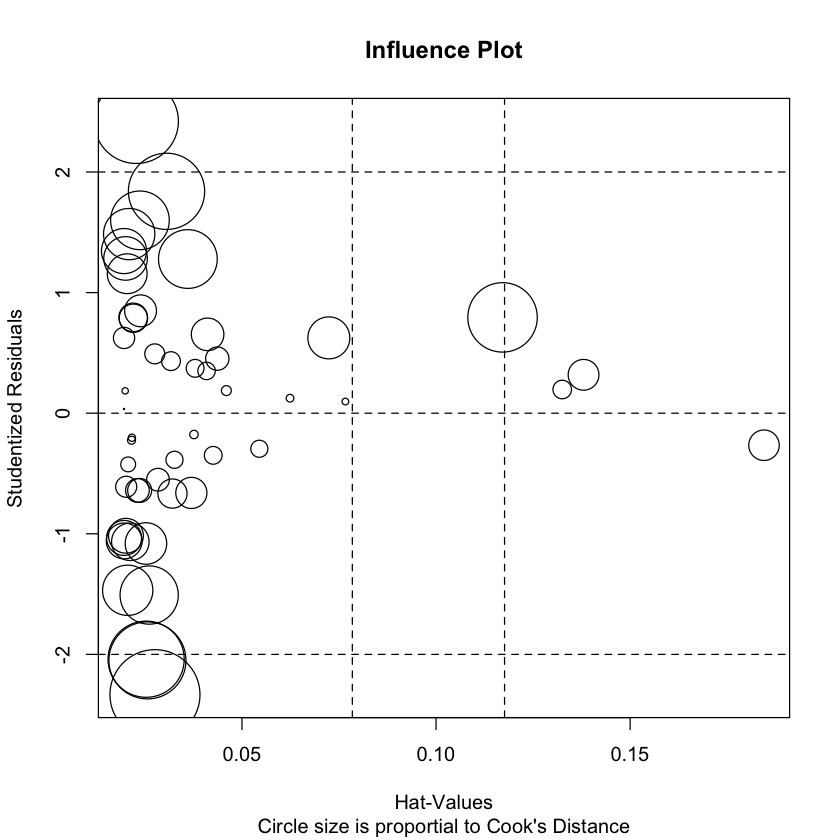

In [138]:
# Influential Observations
# added variable plots 
avPlots(sat.mod)
# Cook's D plot
# identify D values > 4/(n-k-1) 
cutoff <- 4/((nrow(sts.ex.sat)-length(sat.mod$coefficients)-2)) 
plot(sat.mod, which=4, cook.levels=cutoff)
# Influence Plot 
influencePlot(sat.mod,	id.method="identify", main="Influence Plot", sub="Circle size is proportial to Cook's Distance" )

In [ ]:
# Normality of Residuals
# qq plot for studentized resid
qqPlot(fit, main="QQ Plot")
# distribution of studentized residuals
library(MASS)
sresid <- studres(fit) 
hist(sresid, freq=FALSE, 
   main="Distribution of Studentized Residuals")
xfit<-seq(min(sresid),max(sresid),length=40) 
yfit<-dnorm(xfit) 
lines(xfit, yfit)

In [ ]:
# Evaluate homoscedasticity
# non-constant error variance test
ncvTest(fit)
# plot studentized residuals vs. fitted values 
spreadLevelPlot(fit)

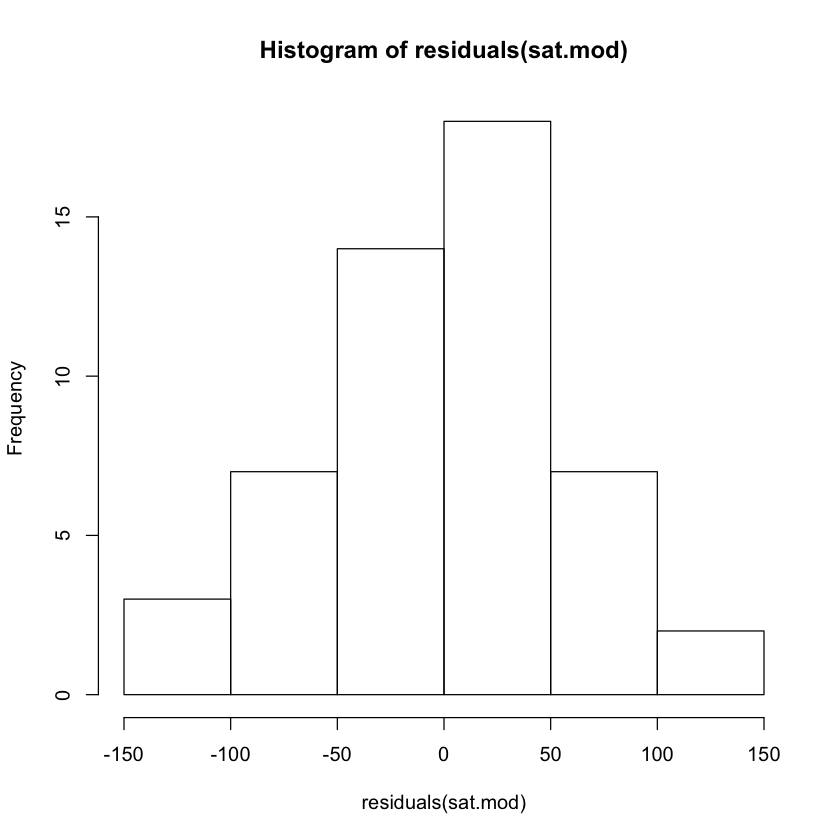

In [80]:
hist(residuals(sat.mod))

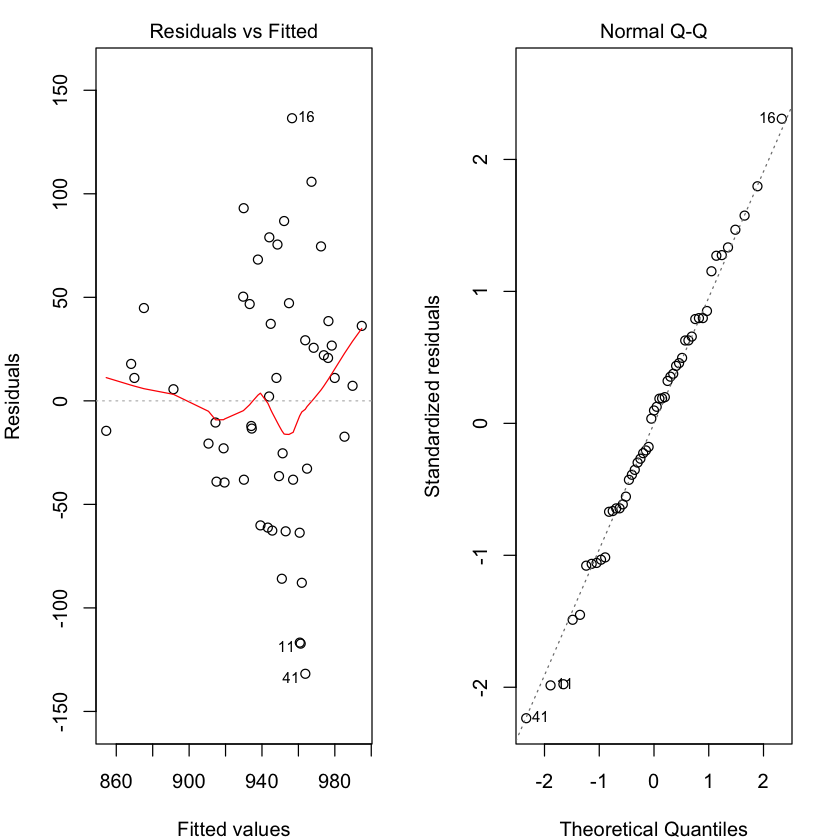

In [94]:
par(mar = c(4, 4, 2, 2), mfrow = c(1, 2)) #optional
plot(sat.mod, which = c(1, 2)) # "which" argument optional


	Shapiro-Wilk normality test

data:  residuals(sat.mod)
W = 0.99144, p-value = 0.9719


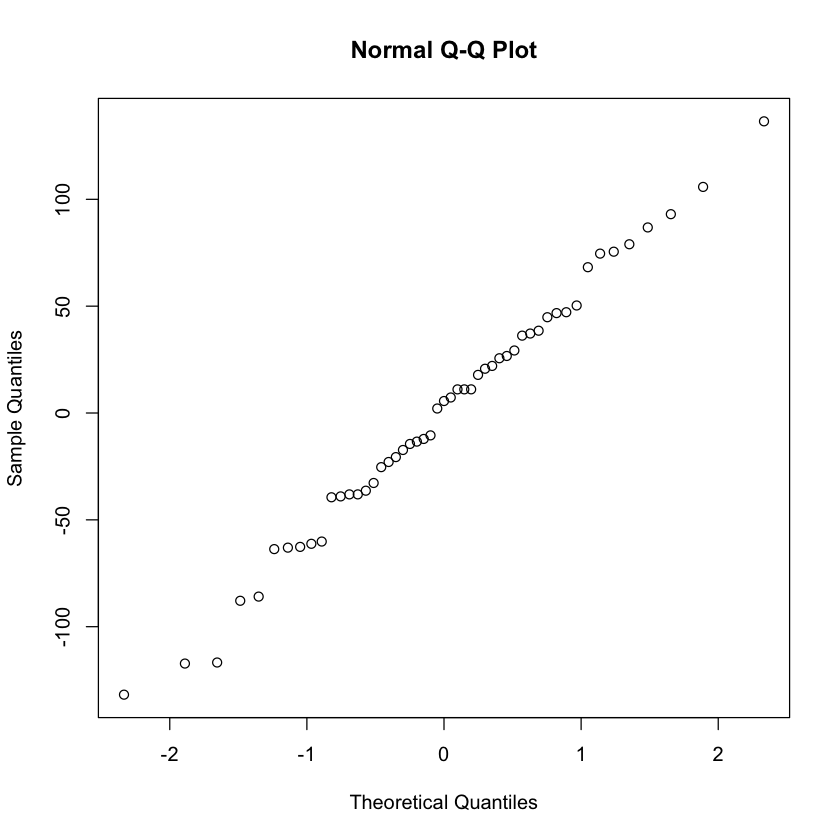

In [89]:
shapiro.test(residuals(sat.mod))
qqnorm(residuals(sat.mod))

In [96]:
## Generate two data sets
## First Normal, second from a t-distribution
#words1 = rnorm(100)

## Have a look at the densities
#plot(density(words1))

## Perform the test
#shapiro.test(words1)
#qqnorm(words1)

In [ ]:
# Evaluate Nonlinearity
# component + residual plot 
crPlots(fit)
# Ceres plots 
ceresPlots(fit)

In [ ]:
durbinWatsonTest(fit)